In [4]:
# starting web3 operations
import numpy as np
import json
from web3 import Web3
import matplotlib.pyplot as plt
# ganache_url = "https://ropsten.infura.io/v3/6072fdc3b95c407caa681f63ebaf72b8"
ganache_url ="http://127.0.0.1:8545"
ropsten = "https://ropsten.infura.io/v3/0345978e22a6431f9222c56ea1f7b6bd"
web3 = Web3(Web3.HTTPProvider(ropsten))
web3.isConnected()

True

In [5]:
# Basic web3 
# block = web3.eth.get_block('latest')
# balance_1 = web3.eth.getBalance("0x37bfB436392DaAE0E91EdcD9c4128FBcADF3919d")
# print(web3.fromWei(balance_1,'ether'))

In [21]:
abi = json.loads('[ { "constant": false, "inputs": [], "name": "del_arr", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": false, "inputs": [], "name": "get_softmax", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": false, "inputs": [ { "name": "C", "type": "int256" }, { "name": "D", "type": "int256" }, { "name": "k", "type": "uint256" }, { "name": "j", "type": "uint256" } ], "name": "getexpon", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": false, "inputs": [], "name": "sum_exp", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [ { "name": "", "type": "int256" } ], "name": "exp", "outputs": [ { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "set_softmax", "outputs": [ { "name": "", "type": "uint256[]" }, { "name": "", "type": "uint256[]" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "set_sumexp", "outputs": [ { "name": "", "type": "uint256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "setallexpon", "outputs": [ { "name": "", "type": "uint256[]" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "setexpon", "outputs": [ { "name": "", "type": "uint256" } ], "payable": false, "stateMutability": "view", "type": "function" } ]')
cont_address = "0xa0030EaC131EcDABeFa34054eF467F265348b3f5"

In [22]:
contract = web3.eth.contract(address=cont_address,abi=abi)

In [8]:
account1 = "0xdd617f9D5120b7b30E4C502fdd6b13dCf286A300"
private_key1="c00b36dc1777e7fda60ff1f55b57c3f51b18c0c16fe44724e451ed062a173d74"
account2 = "0x8883f1016E727C8fE93C1Df471f102bBbAF2B910"
private_key2="8d70f54549b5fb7c04fc016cc88c447fc81aff3af3065c696aee1b529fbc8ba5"
account3 = "0xd39fdd79c3b5b0c411366D5A64ba26E423e1cF61"
private_key3 = "3f3bcef69f8cef4bb28953eebe0b11c40fca5b4ce8c9665d3647afd067050952"
account4 = "0xc35903FEf5A3c481e5374F8757789b7a926d8167"
private_key4 = "e67231d384bdbf3e0c081889ab35ee7858d74ff955923071a621f01bda9dbebf"

In [9]:
# account1 = "0xB195A9E2d2CC6eFD2CcDDC3b590E9C48fa54199D"
# private_key1="f1c47e3da7fac64af7066d0c088a3258c843c7b994b3e384ea7919eab1f6b349"
# account2 = "0xE820D2FfB580b93BAB2658B37D736030fB554519"
# private_key2="bacd9d460ed5e9c06994b030d4cee25fd805a6ed996a96d26957adb32e6bd667"

In [10]:
nonce = web3.eth.getTransactionCount(account1)

In [11]:
def getexpon(a,b,c,d,account1,private_key1):
    nonce = web3.eth.getTransactionCount(account1)
    transaction = contract.functions.getexpon(
        a,b,c,d
         ).buildTransaction({
        'gas': 100000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt.gasUsed

In [12]:
# print(contract.functions.setallexpon().call())
# print("value of sigmoid is:", n/d)

In [13]:
def getsumexpon(account1,private_key1):
    nonce = web3.eth.getTransactionCount(account1)
    transaction = contract.functions.sum_exp(
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('1', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt.gasUsed

In [14]:
def getsoftmax(account1_private_key1):
    nonce = web3.eth.getTransactionCount(account1)
    transaction = contract.functions.get_softmax(
         ).buildTransaction({
        'gas': 3000000,
        'gasPrice': web3.toWei('10', 'gwei'),
        'from': account1,
        'nonce': nonce
        }) 
    signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
    tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
    tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash)
    return tx_receipt.gasUsed

In [15]:
print(contract.functions.set_softmax().call())

[[], []]


In [16]:
x = np.arange(-20,20)
a = np.ones((len(x)))
a

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [17]:
## testing softmax out of blockchain
def softmax(x):
    sumexp = np.sum(np.exp(x))
    return(np.exp(x)/sumexp)

x = np.arange(-20,20)
# print(softmax(x))
y = softmax(x)


Text(0, 0.5, 'Output Values in probability')

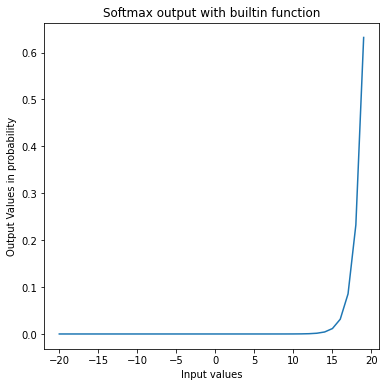

In [18]:
plt.figure(figsize=(6,6))
plt.plot(x,y)
plt.title("Softmax output with builtin function")
plt.xlabel("Input values")
plt.ylabel("Output Values in probability")
# plt.savefig("softmax-off-chain.pdf")

In [23]:
import time
expongas=[]
softexpogas=[]
soft_time=[]
for i in range(len(a)):
    if(i%2==0):
        start = time.time()
        expongas.append(getexpon(int(x[i]),int(a[i]), abs(int(x[i])),abs(int(a[i])),account3,private_key3))
        end = time.time()
        t = end-start
        soft_time.append(t)
    else:
        start = time.time()
        expongas.append(getexpon(int(x[i]),int(a[i]), abs(int(x[i])),abs(int(a[i])),account4,private_key4))
        end = time.time()
        t = end-start
        soft_time.append(t)
    print(i)
gas_sumexpo = getsumexpon(account3,private_key3)
soft_gas = getsoftmax(account4,private_key4)
smaxn,smaxd = contract.functions.set_softmax().call()
print(smaxn,smaxd)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


TypeError: getsoftmax() takes 1 positional argument but 2 were given

In [24]:
print(soft_time)

[14.835530042648315, 24.06520414352417, 24.006142616271973, 11.984691858291626, 11.9080650806427, 24.226805448532104, 24.083243131637573, 24.001973390579224, 12.4498450756073, 11.389252185821533, 11.960666418075562, 24.03543448448181, 36.49055552482605, 11.588168859481812, 12.044418096542358, 23.88220739364624, 12.04860544204712, 24.000183820724487, 23.847105264663696, 12.270127296447754, 23.969586610794067, 12.125899314880371, 11.58250904083252, 24.20037817955017, 11.876938819885254, 11.956545114517212, 12.007409572601318, 12.281390905380249, 23.948253870010376, 12.44886589050293, 23.984344244003296, 23.408418655395508, 12.648542165756226, 11.59658169746399, 23.806191205978394, 24.020767211914062, 12.043122291564941, 24.611401319503784, 11.392988920211792, 12.061436891555786]


In [108]:
softn = np.array(smaxn)
softd = np.array(smaxd)
from textwrap import wrap

In [109]:
expongas

[86662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 41662,
 60488,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574,
 60574]

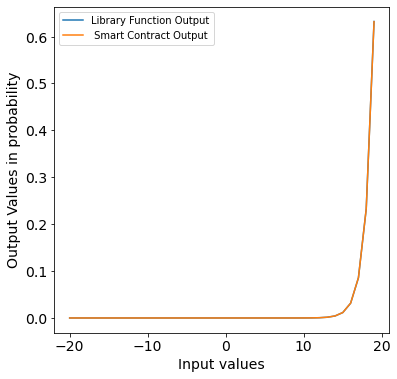

In [110]:
# print(softn/softd)
plt.figure(figsize=(6,6))
plt.plot(x,y,label ="Library Function Output")
plt.plot(x,softn/softd, label = " Smart Contract Output")

# plt.title('Softmax output with Smart Contract function with probability \n values (divisions perfomed outside smart contract')
plt.xlabel("Input values",fontsize=14)
plt.ylabel("Output Values in probability",fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.legend()
plt.savefig("softmax-on-chain.pdf",bbox_inches='tight')
plt.show()

In [111]:
expongas = expongas + soft_gas+gas_sumexpo
expongas

TypeError: can only concatenate list (not "int") to list

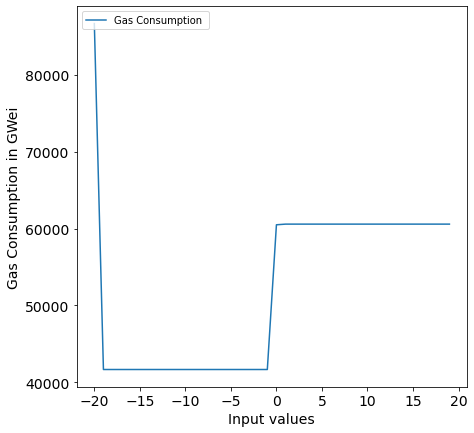

In [112]:
expongas = np.array(expongas)
softexpogas= np.array(softexpogas)
plt.figure(figsize=(7,7))
plt.plot(x,expongas, label="Gas Consumption ")
# plt.title("Exponent computation gas use")
plt.xlabel("Input values", fontsize=14)
plt.ylabel("Gas Consumption in GWei", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.ticklabel_format(style='plain')
plt.legend(loc='upper left')
plt.savefig("softmax_computation_gas.pdf",bbox_inches='tight')
plt.show()

In [35]:
print(expongas[1])
print(gas_sumexpo) 
print(soft_gas) 

3339603
208914
1548981


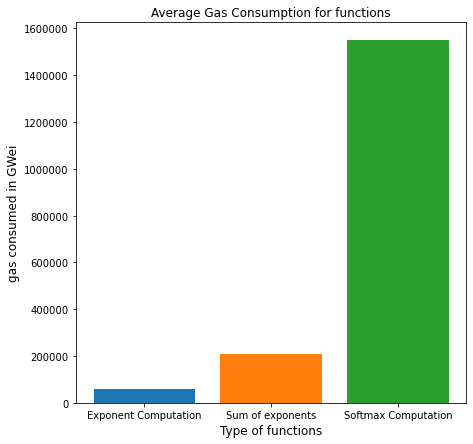

In [26]:
plt.figure(figsize=(7,7))
plt.ticklabel_format(style='plain') 
plt.bar("Exponent Computation", expongas[30])
plt.bar("Sum of exponents", gas_sumexpo)
plt.bar("Softmax Computation", soft_gas)

plt.title("Average Gas Consumption for functions",fontsize=12)
plt.xlabel("Type of functions",fontsize=12)
plt.ylabel("gas consumed in GWei",fontsize=12)
plt.savefig("softmax_gas.pdf",bbox_inches='tight')